#  Time Series

In [1]:
import numpy as np
import pandas as pd

Anything that is observed or measured at many points in time forms a time series. 
Many time series are **fixed** frequency, which is to say that data points occur at regular intervals according to some rule, such as every 15 seconds, every 5 minutes, or once per month. 


Time series can also be irregular without a fixed unit of time or offset between units. 
You may have one of the following:

* Timestamps, specific instants in time
* Fixed periods, such as the month January 2007 or the full year 2010
* Intervals of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
* Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time (e.g., the diameter of a cookie baking each second since being placed in the oven)

The simplest and most widely used kind of time series are those indexed by timestamp. pandas also supports indexes based on timedeltas, which can be a useful way of representing experiment or elapsed time.

pandas provides many built-in time series tools and data algorithms. You can efficiently work with *very large time series and easily slice and dice, aggregate, and resample* irregular and fixed-frequency time series. Some of these tools are especially useful for financial and economics applications, but you could certainly use them to analyze server log data, too

## Date and Time Data Types and Tools

The *datetime*, *time*, and *calendar* modules are the main places to start. The *datetime.datetime* type, or simply *datetime*, is widely used:

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2019, 5, 31, 21, 20, 59, 514473)

In [5]:
now.year, now.month, now.day

(2019, 5, 31)

*timedelta* represents the temporal difference between two *datetime* objects:

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

You can add (or subtract) a *timedelta* or multiple thereof to a datetime object to yield a new shifted object:

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011, 1, 7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

![alt text](images/datetime.png " Types in datetime module")

### Converting Between String and Datetime

You can format *datetime* objects and pandas *Timestamp* objects as strings using **str** or the **strftime** method, passing a format specification:

In [14]:
stamp = datetime(2011, 1, 3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime("%Y - %m - %d")

'2011 - 01 - 03'

![alt text](images/args.png " Types in datetime module")

You can use these same format codes to convert strings to dates using **datetime.strptime**:

In [17]:
value = "2011-01-03"

In [18]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
datestrs = ["7/6/2011", "8/6/2011"]

In [20]:
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

You can use the *parser.parse method* in the third-party **dateutil** package (this is installed automatically when you install pandas):

In [21]:
from dateutil.parser import parse

In [22]:
parse("2011-01-03")

datetime.datetime(2011, 1, 3, 0, 0)

*dateutil* is capable of parsing most human-intelligible date representations:

In [23]:
parse("Jan 31, 1997 10:45 PM")

datetime.datetime(1997, 1, 31, 22, 45)

In international locales, day appearing before month is very common, so you can pass *dayfirst=True* to indicate this:

In [24]:
parse("6/12/2011", dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an *axis index or a column* in a DataFrame. The *to_datetime* method parses many different kinds of date representations.

In [25]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles values that should be considered missing (None, empty string, etc.):

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

*NaT* (Not a Time) is pandas’s null value for timestamp data.

`dateutil.parser` is a useful but imperfect tool. Notably, it will recognize some strings as dates that you might prefer that it didn’t for example, '42' will be parsed as the year 2042 with today’s calendar date.

`datetime` objects also have a number of locale-specific formatting options for systems in other countries or languages. For example, the abbreviated month names will be different on German or French systems compared with English systems. 

![alt text](images/locale.png "Locale-specific date formatting")

## Time Series Basics

In [31]:
np.random.seed(0)

A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or `datetime` objects:

In [32]:
dates = [
    datetime(2011, 1, 2),
    datetime(2011, 1, 5),
    datetime(2011, 1, 7),
    datetime(2011, 1, 8),
    datetime(2011, 1, 10),
    datetime(2011, 1, 12),
]

In [33]:
# ts = pd.Series(np.random.randint(0,10,6), index=dates)
ts = pd.Series(np.arange(6), index=dates)

In [34]:
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int32

Under the hood, these *datetime* objects have been put in a *DatetimeIndex*:

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series **automatically align on the dates**:

In [36]:
ts[::2]

2011-01-02    0
2011-01-07    2
2011-01-10    4
dtype: int32

In [37]:
ts + ts[::2]

2011-01-02    0.0
2011-01-05    NaN
2011-01-07    4.0
2011-01-08    NaN
2011-01-10    8.0
2011-01-12    NaN
dtype: float64

pandas stores timestamps using NumPy’s *datetime64* data type at the nanosecond resolution

In [38]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a *DatetimeIndex* are pandas *Timestamp* objects:

In [39]:
stamp = ts.index[0]

In [40]:
stamp

Timestamp('2011-01-02 00:00:00')

A *Timestamp* can be substituted anywhere you would use a *datetime* object.

### Indexing, Selection, Subsetting

Time series behaves like any other **pandas.Series** when you are indexing and selecting data based on label:

In [41]:
stamp = ts.index[2]

In [42]:
ts[stamp]

2

As a convenience, you can also pass a string that is interpretable as a date:

In [43]:
ts["1/10/2011"]

4

In [44]:
ts["20110110"]

4

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [45]:
# np.random.randint(0,100,1000)
longer_ts = pd.Series(np.arange(1000), index=pd.date_range("1/1/2000", periods=1000))

In [46]:
longer_ts

2000-01-01      0
2000-01-02      1
2000-01-03      2
2000-01-04      3
2000-01-05      4
2000-01-06      5
2000-01-07      6
2000-01-08      7
2000-01-09      8
2000-01-10      9
2000-01-11     10
2000-01-12     11
2000-01-13     12
2000-01-14     13
2000-01-15     14
2000-01-16     15
2000-01-17     16
2000-01-18     17
2000-01-19     18
2000-01-20     19
2000-01-21     20
2000-01-22     21
2000-01-23     22
2000-01-24     23
2000-01-25     24
2000-01-26     25
2000-01-27     26
2000-01-28     27
2000-01-29     28
2000-01-30     29
             ... 
2002-08-28    970
2002-08-29    971
2002-08-30    972
2002-08-31    973
2002-09-01    974
2002-09-02    975
2002-09-03    976
2002-09-04    977
2002-09-05    978
2002-09-06    979
2002-09-07    980
2002-09-08    981
2002-09-09    982
2002-09-10    983
2002-09-11    984
2002-09-12    985
2002-09-13    986
2002-09-14    987
2002-09-15    988
2002-09-16    989
2002-09-17    990
2002-09-18    991
2002-09-19    992
2002-09-20    993
2002-09-21

In [47]:
longer_ts["2001"]

2001-01-01    366
2001-01-02    367
2001-01-03    368
2001-01-04    369
2001-01-05    370
2001-01-06    371
2001-01-07    372
2001-01-08    373
2001-01-09    374
2001-01-10    375
2001-01-11    376
2001-01-12    377
2001-01-13    378
2001-01-14    379
2001-01-15    380
2001-01-16    381
2001-01-17    382
2001-01-18    383
2001-01-19    384
2001-01-20    385
2001-01-21    386
2001-01-22    387
2001-01-23    388
2001-01-24    389
2001-01-25    390
2001-01-26    391
2001-01-27    392
2001-01-28    393
2001-01-29    394
2001-01-30    395
             ... 
2001-12-02    701
2001-12-03    702
2001-12-04    703
2001-12-05    704
2001-12-06    705
2001-12-07    706
2001-12-08    707
2001-12-09    708
2001-12-10    709
2001-12-11    710
2001-12-12    711
2001-12-13    712
2001-12-14    713
2001-12-15    714
2001-12-16    715
2001-12-17    716
2001-12-18    717
2001-12-19    718
2001-12-20    719
2001-12-21    720
2001-12-22    721
2001-12-23    722
2001-12-24    723
2001-12-25    724
2001-12-26

In [48]:
longer_ts["2001-05"]

2001-05-01    486
2001-05-02    487
2001-05-03    488
2001-05-04    489
2001-05-05    490
2001-05-06    491
2001-05-07    492
2001-05-08    493
2001-05-09    494
2001-05-10    495
2001-05-11    496
2001-05-12    497
2001-05-13    498
2001-05-14    499
2001-05-15    500
2001-05-16    501
2001-05-17    502
2001-05-18    503
2001-05-19    504
2001-05-20    505
2001-05-21    506
2001-05-22    507
2001-05-23    508
2001-05-24    509
2001-05-25    510
2001-05-26    511
2001-05-27    512
2001-05-28    513
2001-05-29    514
2001-05-30    515
2001-05-31    516
Freq: D, dtype: int32

Slicing with *datetime* objects works as well:

In [49]:
ts[datetime(2011, 1, 7) :]

2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int32

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [50]:
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int32

In [51]:
ts["1/6/2011":"1/11/2011"]

2011-01-07    2
2011-01-08    3
2011-01-10    4
dtype: int32

You can pass either a string date, *datetime*, or timestamp. Remember that slicing in this manner produces views on the source time series like slicing NumPy arrays. This means that no data is copied and modifications on the slice will be reflected in the original data.

There is an equivalent instance method, **truncate**, that slices a Series between two
dates:

In [52]:
ts.truncate(after="1/7/2011")

2011-01-02    0
2011-01-05    1
2011-01-07    2
dtype: int32

All of this holds true for DataFrame as well, indexing on its rows:

In [53]:
dates = pd.date_range("1/1/2000", periods=100, freq="W-WED")

In [54]:
len(dates)

100

In [55]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [56]:
long_df = pd.DataFrame(
    np.arange(1, 401).reshape(100, 4),
    index=dates,
    columns=["Colorado", "Texas", "New York", "Ohio"],
)

In [57]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,1,2,3,4
2000-01-12,5,6,7,8
2000-01-19,9,10,11,12
2000-01-26,13,14,15,16
2000-02-02,17,18,19,20
2000-02-09,21,22,23,24
2000-02-16,25,26,27,28
2000-02-23,29,30,31,32
2000-03-01,33,34,35,36
2000-03-08,37,38,39,40


In [58]:
long_df.loc["5-2001"]

,Colorado,Texas,New York,Ohio
2001-05-02,277,278,279,280
2001-05-09,281,282,283,284
2001-05-16,285,286,287,288
2001-05-23,289,290,291,292
2001-05-30,293,294,295,296


### Time Series with Duplicate Indices

In [59]:
dates = pd.DatetimeIndex(["1/1/2000", "1/2/2000", "1/2/2000", "1/2/2000", "1/3/2000"])

In [60]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [61]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

We can tell that the index is not unique by checking its *is_unique* property:

In [62]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce *scalar values* or *slices* depending on whether a timestamp is duplicated:

In [63]:
dup_ts["1/3/2000"]  # not duplicated

4

In [64]:
dup_ts["1/2/2000"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

Suppose you wanted to aggregate the data having non-unique timestamps. One way to do this is to use *groupby* and pass *level=0*:

In [65]:
grouped = dup_ts.groupby(level=0)

In [66]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [67]:
grouped.sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int32

In [68]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [69]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### Date Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be **irregular**; that is, they have no fixed frequency. 

It’s often desirable to work relative to a **fixed frequency**, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series. 

Fortunately pandas has a full suite of standard time series frequencies and tools for: 

* resampling
* inferring frequencies
* generating fixed-frequency date ranges. 

For example, you can convert the sample time series to be *fixed daily frequency* by calling `resample`:

In [70]:
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int32

In [71]:
resampler = ts.resample("D")  # 'D' is interpreted as daily frequency

In [72]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

Conversion between frequencies or resampling is a big enough topic to have its own section later.

### Generating Date Ranges

*pandas.date_range* is responsible for generating a `DatetimeIndex` with an indicated length according to a **particular frequency**:

In [73]:
index = pd.date_range("2012-04-01", "2012-06-01")

In [74]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, `date_range` generates **daily timestamps**. If you pass *only a start or end date*, you must pass a **number of periods** to generate:

In [75]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [76]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The `start` and `end` dates define strict boundaries for the generated date index. 
If you wanted a date index containing the *last business day of each month*, you would pass the **'BM'** frequency and only dates falling on or inside the date interval will be included:

In [77]:
pd.date_range("2019-05-01", "2019-12-31", freq="B")

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-06',
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-13', '2019-05-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=175, freq='B')

In [78]:
pd.date_range("2000-01-01", "2000-12-01", freq="D")

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-11-22', '2000-11-23', '2000-11-24', '2000-11-25',
               '2000-11-26', '2000-11-27', '2000-11-28', '2000-11-29',
               '2000-11-30', '2000-12-01'],
              dtype='datetime64[ns]', length=336, freq='D')

In [79]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

![alt text](images/bm.png "Locale-specific date formatting")

`date_range` by default preserves the time (if any) of the start or end timestamp:

In [80]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps **normalized** to midnight as a convention. To do this, there is a *normalize* option:

In [81]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [82]:
#  Normalize start/end dates to midnight before generating date range
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

Frequencies in pandas are composed of

* a **base frequency**
* a multiplier 

Base frequencies are typically referred to by a string alias, like *'M'* for monthly or *'H'* for hourly. 

For each base frequency, there is an *object* defined generally referred to as a **date offset**. 

For example, hourly frequency can be represented with the `Hour` class:

In [83]:
from pandas.tseries.offsets import Hour, Minute

In [84]:
hour = Hour()

In [85]:
hour

<Hour>

You can define a multiple of an offset by **passing an integer**:

In [86]:
four_hours = Hour(4)

In most applications, you would *never need to explicitly create one of these objects*, instead using a **string alias like 'H' or '4H'**. Putting an integer before the base frequency creates a multiple:

In [87]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4h")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [88]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition:

In [89]:
Hour(2) + Minute(30)

<150 * Minutes>

In [90]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [91]:
pd.date_range("2000-01-01", periods=10, freq=Hour(1) + Minute(30))

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that *are not evenly spaced*. For example, 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not. We refer to these as **anchored** offsets.

List of frequency codes and date offset classes available in pandas:

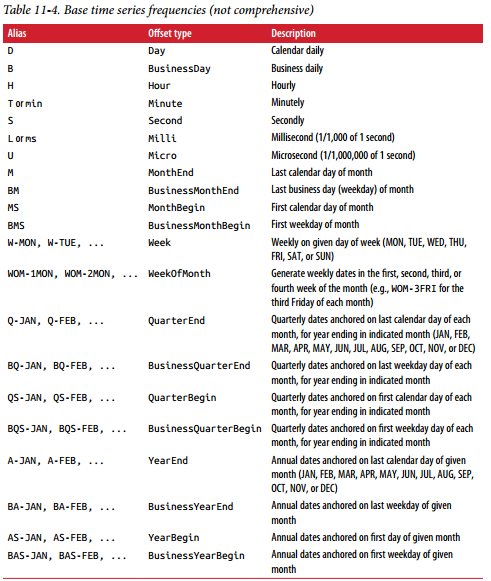

**Users can define their own custom frequency classes to provide date logic not available in pandas**

### Week of month dates

One useful frequency class is “week of month,” starting with **WOM**. This enables you to get dates like the *"third Friday of each month"*:

In [92]:
rng = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")

In [93]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

**Shifting**: Moving data backward and forward through time. 

Both `Series` and `DataFrame` have a `shift` method for doing naive shifts forward or backward, **leaving the index unmodified**:

In [94]:
ts = pd.Series(np.arange(1, 5), index=pd.date_range("1/1/2000", periods=4, freq="M"))

In [95]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int32

In [96]:
ts.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    1.0
2000-04-30    2.0
Freq: M, dtype: float64

In [97]:
ts.shift(-2)

2000-01-31    3.0
2000-02-29    4.0
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64

When we shift like this, **missing data** is introduced either at the start or the end of the time series.

A common use of **shift** is computing *percent changes* in a time series or multiple time series as DataFrame columns. This is expressed as:

In [98]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int32

In [99]:
ts.shift(1)

2000-01-31    NaN
2000-02-29    1.0
2000-03-31    2.0
2000-04-30    3.0
Freq: M, dtype: float64

In [100]:
ts / ts.shift(1)

2000-01-31         NaN
2000-02-29    2.000000
2000-03-31    1.500000
2000-04-30    1.333333
Freq: M, dtype: float64

In [101]:
(ts / ts.shift(1)) - 1

2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64

In [102]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int32

In [103]:
ts.shift(1)

2000-01-31    NaN
2000-02-29    1.0
2000-03-31    2.0
2000-04-30    3.0
Freq: M, dtype: float64

In [104]:
(ts / ts.shift(1))

2000-01-31         NaN
2000-02-29    2.000000
2000-03-31    1.500000
2000-04-30    1.333333
Freq: M, dtype: float64

In [105]:
(ts / ts.shift(1)) - 1

2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64

Because naive shifts *leave the index unmodified*, some data is discarded. Thus if the frequency is known, it can be passed to **shift to advance the timestamps** instead of simply the data:

In [106]:
# shift every timestamp for 2 months

ts.shift(2, freq="M")

2000-03-31    1
2000-04-30    2
2000-05-31    3
2000-06-30    4
Freq: M, dtype: int32

Other frequencies can be passed, too, giving you some flexibility in how to *lead and lag* the data:

In [107]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int32

In [108]:
# shift every timestamp for 2 days
ts.shift(3, freq="D")

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int32

In [109]:
ts.shift(1, freq="90T")  # T stands for minutes.

2000-01-31 01:30:00    1
2000-02-29 01:30:00    2
2000-03-31 01:30:00    3
2000-04-30 01:30:00    4
Freq: M, dtype: int32

### Shifting dates with offsets

The pandas date offsets can also be used with `datetime` or `Timestamp` objects:

In [110]:
from pandas.tseries.offsets import Day, MonthEnd

In [111]:
now = datetime(2011, 11, 17)

In [112]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If you add an *anchored offset* like `MonthEnd`, the first increment will “roll forward” a date to the next date according to the frequency rule:

In [113]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [114]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [115]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward by simply using their `rollforward` and `rollback` methods, respectively:

In [116]:
offset = MonthEnd()

In [117]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [118]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

A creative use of date offsets is to use these methods with `groupby`:

In [119]:
ts = pd.Series(np.arange(20), index=pd.date_range("1/15/2000", periods=20, freq="4d"))

In [120]:
ts

2000-01-15     0
2000-01-19     1
2000-01-23     2
2000-01-27     3
2000-01-31     4
2000-02-04     5
2000-02-08     6
2000-02-12     7
2000-02-16     8
2000-02-20     9
2000-02-24    10
2000-02-28    11
2000-03-03    12
2000-03-07    13
2000-03-11    14
2000-03-15    15
2000-03-19    16
2000-03-23    17
2000-03-27    18
2000-03-31    19
Freq: 4D, dtype: int32

In [121]:
ts.groupby(offset.rollforward).count()

2000-01-31    5
2000-02-29    7
2000-03-31    8
dtype: int64

In [122]:
ts.groupby(offset.rollforward).mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
dtype: float64

An easier and faster way to do this is using `resample`:

In [123]:
ts.resample("M").mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
Freq: M, dtype: float64

## Time Zone Handling

Working with time zones is generally considered one of the most unpleasant parts of time series manipulation. 

Many time series users choose to work with time series in *coordinated universal time* or UTC, which is the successor to *Greenwich Mean Time* and is the current international standard. 

Time zones are expressed as offsets from UTC; for example, New York is four hours behind UTC during daylight saving time and five hours behind the rest of the year.

In Python, time zone information comes from the third-party **pytz** library, which exposes the Olson database, a compilation of world time zone information. 

This is especially important for historical data because the daylight saving time (DST) transition dates (and even UTC offsets) have been changed numerous times depending on the whims of local governments. In the United States, the DST transition times have been changed many times since 1900!

In [124]:
import pytz

In [125]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

To get a time zone object from *pytz*, use *pytz.timezone*:

In [126]:
tz = pytz.timezone("America/New_York")

In [127]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will accept either time zone names or these objects.

### Time Zone Localization and Conversion

By default, time series in pandas are **time zone naive**. For example, consider the following time series:

In [128]:
rng = pd.date_range("3/9/2012 9:30", periods=6, freq="D")
ts = pd.Series(np.arange(len(rng)), index=rng)

In [129]:
ts

2012-03-09 09:30:00    0
2012-03-10 09:30:00    1
2012-03-11 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
Freq: D, dtype: int32

The index’s *tz* field is None:

In [130]:
print(ts.index.tz)

None


Date ranges can be generated with a time zone set:

In [131]:
pd.date_range("3/9/2012 9:30", periods=10, freq="D", tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from naive to **localized** is handled by the **tz_localize** method:

In [132]:
ts

2012-03-09 09:30:00    0
2012-03-10 09:30:00    1
2012-03-11 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
Freq: D, dtype: int32

In [133]:
ts_utc = ts.tz_localize("UTC")

In [134]:
ts_utc

2012-03-09 09:30:00+00:00    0
2012-03-10 09:30:00+00:00    1
2012-03-11 09:30:00+00:00    2
2012-03-12 09:30:00+00:00    3
2012-03-13 09:30:00+00:00    4
2012-03-14 09:30:00+00:00    5
Freq: D, dtype: int32

In [135]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized to a particular time zone, it can be converted to another time zone with **tz_convert**:

In [136]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00    0
2012-03-10 04:30:00-05:00    1
2012-03-11 05:30:00-04:00    2
2012-03-12 05:30:00-04:00    3
2012-03-13 05:30:00-04:00    4
2012-03-14 05:30:00-04:00    5
Freq: D, dtype: int32

In the case of the preceding time series, which straddles a DST transition in the America/New_York time zone, we could localize to EST and convert to, say, UTC or Berlin time:

In [137]:
ts_eastern = ts.tz_localize("America/New_York")

In [138]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00    0
2012-03-10 14:30:00+00:00    1
2012-03-11 13:30:00+00:00    2
2012-03-12 13:30:00+00:00    3
2012-03-13 13:30:00+00:00    4
2012-03-14 13:30:00+00:00    5
Freq: D, dtype: int32

In [139]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    0
2012-03-10 15:30:00+01:00    1
2012-03-11 14:30:00+01:00    2
2012-03-12 14:30:00+01:00    3
2012-03-13 14:30:00+01:00    4
2012-03-14 14:30:00+01:00    5
Freq: D, dtype: int32

**tz_localize** and **tz_convert** are also instance methods on *DatetimeIndex*:

In [140]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

Localizing naive timestamps also checks for ambiguous or nonexistent times around daylight saving time transitions.

### Operations with Time Zone−Aware Timestamp Objects

Similar to time series and date ranges, individual *Timestamp* objects similarly can be localized from naive to time zone–aware and converted from one time zone to another:

In [141]:
stamp = pd.Timestamp("2011-03-12 04:00")

In [142]:
stamp

Timestamp('2011-03-12 04:00:00')

In [143]:
stamp_utc = stamp.tz_localize("utc")

In [144]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

You can also pass a time zone when creating the Timestamp:

In [145]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")

In [146]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone–aware Timestamp objects internally store a UTC timestamp value as nano‐ seconds since the Unix epoch (January 1, 1970); this UTC value is invariant between time zone conversions:

In [147]:
stamp_utc.value

1299902400000000000

In [148]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

When performing time arithmetic using pandas’s *DateOffset* objects, pandas respects daylight saving time transitions where possible. Here we construct timestamps that occur right before DST transitions (forward and backward). First, 30 minutes before transitioning to DST:

In [149]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp("2012-03-12 01:30", tz="US/Eastern")

In [150]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [151]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

Then, 90 minutes before transitioning out of DST:

In [152]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")

In [153]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [154]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

If two time series with different time zones are combined, the result will be UTC. Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen:

In [155]:
rng = pd.date_range("3/7/2012 9:30", periods=10, freq="B")
ts = pd.Series(np.arange(len(rng)), index=rng)

In [156]:
ts

2012-03-07 09:30:00    0
2012-03-08 09:30:00    1
2012-03-09 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
2012-03-15 09:30:00    6
2012-03-16 09:30:00    7
2012-03-19 09:30:00    8
2012-03-20 09:30:00    9
Freq: B, dtype: int32

In [157]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")
result = ts1 + ts2

In [158]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

Periods represent ***timespans***, like days, months, quarters, or years. 
The `Period` class represents this data type, requiring:
* a string or integer
* a frequency (from Table 11-4):

In [159]:
p = pd.Period(2007, freq="D")

In [160]:
p.start_time

Timestamp('2007-01-01 00:00:00')

In [161]:
p.end_time

Timestamp('2007-01-01 23:59:59.999999999')

In [162]:
p.freq

<Day>

In [163]:
p = pd.Period(2007, freq="Y")

In [164]:
p.start_time

Timestamp('2007-01-01 00:00:00')

In [165]:
p.end_time

Timestamp('2007-12-31 23:59:59.999999999')

In [166]:
p = pd.Period(2007, freq="Q-FEB")

In [167]:
p.start_time, p.end_time

(Timestamp('2006-12-01 00:00:00'), Timestamp('2007-02-28 23:59:59.999999999'))

In [168]:
p = pd.Period(2007, freq="A-DEC")

In [169]:
p

Period('2007', 'A-DEC')

In [170]:
p.start_time, p.end_time

(Timestamp('2007-01-01 00:00:00'), Timestamp('2007-12-31 23:59:59.999999999'))

This Period object represents the full timespan from "January 1, 2007, to December 31, 2007," inclusive.

Conveniently, adding and subtracting integers from periods has the effect of **shifting by their frequency**:

In [171]:
(p + 5).start_time, (p + 5).end_time

(Timestamp('2012-01-01 00:00:00'), Timestamp('2012-12-31 23:59:59.999999999'))

In [172]:
p - 2

Period('2005', 'A-DEC')

If two periods have the *same frequency*, their difference is the number of units between them:

In [173]:
pd.Period("2014", freq="A-DEC") - p

7

Regular *ranges of periods* can be constructed with the `period_range` function:

In [174]:
rng = pd.period_range("2000-01-01", "2000-06-30", freq="Q")

In [175]:
list(rng)

[Period('2000Q1', 'Q-DEC'), Period('2000Q2', 'Q-DEC')]

In [176]:
rng = pd.period_range("2000-01-01", "2000-06-30", freq="D")

In [177]:
rng

PeriodIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
             '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
             '2000-01-09', '2000-01-10',
             ...
             '2000-06-21', '2000-06-22', '2000-06-23', '2000-06-24',
             '2000-06-25', '2000-06-26', '2000-06-27', '2000-06-28',
             '2000-06-29', '2000-06-30'],
            dtype='period[D]', length=182, freq='D')

In [178]:
rng = pd.period_range("2000-01-01", "2000-06-30", freq="M")

In [179]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

The `PeriodIndex` class stores a sequence of periods and can serve *as an axis index* in any pandas data structure:

In [180]:
pd.Series(np.arange(6), index=rng)

2000-01    0
2000-02    1
2000-03    2
2000-04    3
2000-05    4
2000-06    5
Freq: M, dtype: int32

If you have an array of strings, you can also use the `PeriodIndex` class:

In [181]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [182]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")

In [183]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

#### Period Frequency Conversion

`Periods` and `PeriodIndex` objects can be converted to **another frequency** with their `asfreq` method. 

As an example, suppose we had an *annual period* and wanted to convert it into a *monthly period* either at the start or end of the year. This is fairly straightforward:

In [184]:
p = pd.Period("2007", freq="Y")

In [185]:
p

Period('2007', 'A-DEC')

In [186]:
p.start_time, p.end_time

(Timestamp('2007-01-01 00:00:00'), Timestamp('2007-12-31 23:59:59.999999999'))

In [187]:
p.asfreq("M", how="start")

Period('2007-01', 'M')

In [188]:
p

Period('2007', 'A-DEC')

In [189]:
p.start_time, p.end_time

(Timestamp('2007-01-01 00:00:00'), Timestamp('2007-12-31 23:59:59.999999999'))

In [190]:
p = pd.Period("2007", freq="A-DEC")

In [191]:
p

Period('2007', 'A-DEC')

In [192]:
p.asfreq("M", how="start")

Period('2007-01', 'M')

In [193]:
p.asfreq("M", how="end")

Period('2007-12', 'M')

Think of `Period('2007', 'A-DEC')` as being a sort of cursor pointing to a span of time, **subdivided by monthly periods**.

For a *fiscal year* ending on a month other than December, the corresponding monthly subperiods are different:

In [194]:
p = pd.Period("2007", freq="A-JUN")

In [195]:
p

Period('2007', 'A-JUN')

In [196]:
p.asfreq("M", "start")

Period('2006-07', 'M')

In [197]:
p.asfreq("M", "end")

Period('2007-06', 'M')

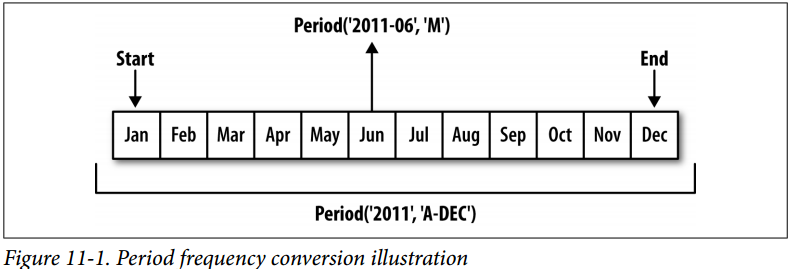

When you are converting from **high to low frequency**, pandas determines the superperiod depending on where the subperiod “belongs.” For example, in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period:

In [198]:
p = pd.Period("Aug-2007", "M")

In [199]:
p.asfreq("A-JUN")

Period('2008', 'A-JUN')

Whole *PeriodIndex* objects or time series can be similarly converted with the same semantics:

In [200]:
rng = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.arange(len(rng)), index=rng)

In [201]:
ts

2006    0
2007    1
2008    2
2009    3
Freq: A-DEC, dtype: int32

In [202]:
ts.asfreq("M", how="start")

2006-01    0
2007-01    1
2008-01    2
2009-01    3
Freq: M, dtype: int32

In [203]:
ts.asfreq("M", how="end")

2006-12    0
2007-12    1
2008-12    2
2009-12    3
Freq: M, dtype: int32

Here, the annual periods are replaced with monthly periods corresponding to the first month falling within each  annual period. If we instead wanted the last business day of each year, we can use the 'B' frequency and indicate that we want the end of the period:

In [204]:
ts.asfreq("B", how="end")

2006-12-29    0
2007-12-31    1
2008-12-31    2
2009-12-31    3
Freq: B, dtype: int32

### Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. 

Much quarterly data is reported relative to a **fiscal year end**, typically the last calendar or business day of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning depending on fiscal year end. 

pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [205]:
p = pd.Period("2012Q4", freq="Q-JAN")

In [206]:
p

Period('2012Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency. 

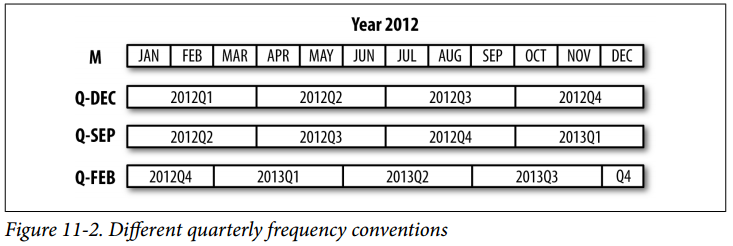

In [207]:
p.asfreq("D", "start")

Period('2011-11-01', 'D')

In [208]:
p.asfreq("D", "end")

Period('2012-01-31', 'D')

Thus, it’s possible to do easy period arithmetic; for example, to get the timestamp at 4 PM on the second-to-last business day of the quarter, you could do:

In [209]:
p4pm = (p.asfreq("B", "e") - 1).asfreq("T", "s") + 16 * 60

In [210]:
p4pm

Period('2012-01-30 16:00', 'T')

In [211]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

You can generate quarterly ranges using period_range. Arithmetic is identical, too:

In [212]:
rng = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

In [213]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [214]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [215]:
new_rng = (rng.asfreq("B", "e") - 1).asfreq("T", "s") + 16 * 60
ts.index = new_rng.to_timestamp()

In [216]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

Series and DataFrame objects *indexed by timestamps* can be converted to periods with the **to_period** method:

In [217]:
rng = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.arange(3), index=rng)

In [218]:
ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
Freq: M, dtype: int32

In [219]:
pts = ts.to_period()

In [220]:
pts

2000-01    0
2000-02    1
2000-03    2
Freq: M, dtype: int32

Since periods refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. 

While the frequency of the new **PeriodIndex** is inferred from the timestamps by default, you can specify any frequency you want.

There is also no problem with having duplicate periods in the result:

In [221]:
rng = pd.date_range("1/29/2000", periods=6, freq="D")

In [222]:
ts2 = pd.Series(np.arange(6), index=rng)

In [223]:
ts2

2000-01-29    0
2000-01-30    1
2000-01-31    2
2000-02-01    3
2000-02-02    4
2000-02-03    5
Freq: D, dtype: int32

In [224]:
ts2.to_period("M")

2000-01    0
2000-01    1
2000-01    2
2000-02    3
2000-02    4
2000-02    5
Freq: M, dtype: int32

To convert back to timestamps, use **to_timestamp**:

In [225]:
pts = ts2.to_period()

In [226]:
pts

2000-01-29    0
2000-01-30    1
2000-01-31    2
2000-02-01    3
2000-02-02    4
2000-02-03    5
Freq: D, dtype: int32

In [227]:
pts.to_timestamp(how="end")

2000-01-29    0
2000-01-30    1
2000-01-31    2
2000-02-01    3
2000-02-02    4
2000-02-03    5
Freq: D, dtype: int32

### Resampling and Frequency Conversion

**Resampling**: process of converting a time series from one frequency to
another. 

Aggregating *higher frequency data* to *lower frequency* is called **downsampling**, while converting lower frequency to higher frequency is called **upsampling**. 

Not all resampling falls into either of these categories; for example, converting W-WED
(weekly on Wednesday) to `W-FRI` is neither upsampling nor downsampling.

`resample` is the workhorse function for all frequency conversion. 

`resample` has a similar API to `groupby`; you call `resample` to group the data, then call an aggregation function:

In [228]:
rng = pd.date_range("2000-01-01", periods=100, freq="D")

In [229]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [230]:
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
2000-01-07     6
2000-01-08     7
2000-01-09     8
2000-01-10     9
2000-01-11    10
2000-01-12    11
2000-01-13    12
2000-01-14    13
2000-01-15    14
2000-01-16    15
2000-01-17    16
2000-01-18    17
2000-01-19    18
2000-01-20    19
2000-01-21    20
2000-01-22    21
2000-01-23    22
2000-01-24    23
2000-01-25    24
2000-01-26    25
2000-01-27    26
2000-01-28    27
2000-01-29    28
2000-01-30    29
              ..
2000-03-11    70
2000-03-12    71
2000-03-13    72
2000-03-14    73
2000-03-15    74
2000-03-16    75
2000-03-17    76
2000-03-18    77
2000-03-19    78
2000-03-20    79
2000-03-21    80
2000-03-22    81
2000-03-23    82
2000-03-24    83
2000-03-25    84
2000-03-26    85
2000-03-27    86
2000-03-28    87
2000-03-29    88
2000-03-30    89
2000-03-31    90
2000-04-01    91
2000-04-02    92
2000-04-03    93
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    

In [231]:
ts.resample("M").mean()

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

In [232]:
ts.resample("W").mean()

2000-01-02     0.5
2000-01-09     5.0
2000-01-16    12.0
2000-01-23    19.0
2000-01-30    26.0
2000-02-06    33.0
2000-02-13    40.0
2000-02-20    47.0
2000-02-27    54.0
2000-03-05    61.0
2000-03-12    68.0
2000-03-19    75.0
2000-03-26    82.0
2000-04-02    89.0
2000-04-09    96.0
Freq: W-SUN, dtype: float64

In [233]:
ts.resample("M", kind="period").mean()

2000-01    15
2000-02    45
2000-03    75
2000-04    95
Freq: M, dtype: int32

In [234]:
ts.resample("W", kind="period").mean()

1999-12-27/2000-01-02     0.5
2000-01-03/2000-01-09     5.0
2000-01-10/2000-01-16    12.0
2000-01-17/2000-01-23    19.0
2000-01-24/2000-01-30    26.0
2000-01-31/2000-02-06    33.0
2000-02-07/2000-02-13    40.0
2000-02-14/2000-02-20    47.0
2000-02-21/2000-02-27    54.0
2000-02-28/2000-03-05    61.0
2000-03-06/2000-03-12    68.0
2000-03-13/2000-03-19    75.0
2000-03-20/2000-03-26    82.0
2000-03-27/2000-04-02    89.0
2000-04-03/2000-04-09    96.0
Freq: W-SUN, dtype: float64

In [235]:
ts.resample("M").sum()

2000-01-31     465
2000-02-29    1305
2000-03-31    2325
2000-04-30     855
Freq: M, dtype: int32

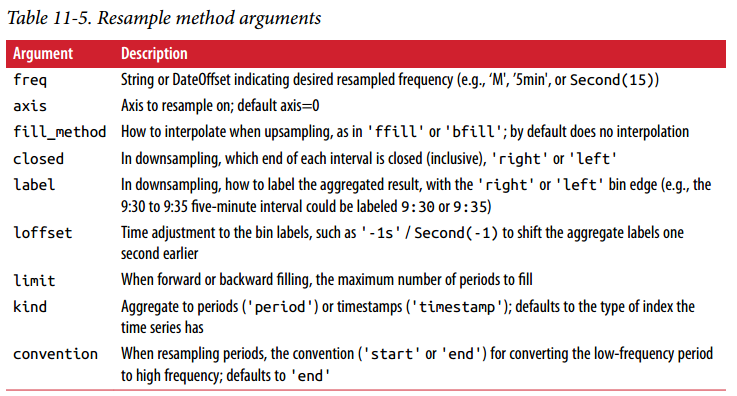

### Downsampling

Aggregating data to a regular, *lower frequency* is a pretty normal time series task. 
The data you’re aggregating **doesn’t need to be fixed frequently**; 

the desired frequency defines ***bin edges*** that are used to slice the time series into pieces to aggregate. 

For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one month intervals. 

Each interval is said to be ***half-open***:
**a data point can only belong to one interval, and the union of the intervals must make up the whole time frame**.

There are a couple things to think about when using `resample` to downsample data:

* Which side of each interval is **closed**
* How to label each aggregated bin, either with the start of the interval or the end

To illustrate, let’s look at some one-minute data:

In [236]:
rng = pd.date_range("2000-01-01", periods=12, freq="T")

In [237]:
ts = pd.Series(np.arange(12), index=rng)

In [238]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

Suppose you wanted to aggregate this data into *five-minute* chunks or *bars* by taking
the sum of each group:

`closed = right` & `label = left`

(55,00] ==> 56, 57, 58, 59, 00

(00,05] ==> 1, 2, 3, 4, 5

(05,10] ==> 6, 7, 8, 9, 10

(10,15] ==> 11

In [239]:
ts.resample("5min", closed="right", label="left").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

`closed = left` & `label = left`

There is no point in series for first bucket, so remove it.

[55,00) ==> 55, 56, 57, 58, 59 

[00,05) ==> 0, 1, 2, 3, 4

[05,10) ==> 5, 6, 7, 8, 9

[10,15) ==> 10, 11

In [240]:
ts.resample("5min", closed="left", label="left").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

`closed = right` & `label = right`

(55,00] ==> 56, 57, 58, 59, 00

(00,05] ==> 1, 2, 3, 4, 5

(05,10] ==> 6, 7, 8, 9, 10

(10,15] ==> 11

In [241]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

`closed = left` & `label = right`

[55,00) ==> 55, 56, 57, 58, 59

[00,05) ==> 0, 1, 2, 3, 4

[05,10) ==> 5, 6, 7, 8, 9

[10,15) ==> 10, 11

In [242]:
ts.resample("5min", closed="left", label="right").sum()

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

The frequency you pass defines **bin edges** in five-minute increments. By default,
the **left bin edge is inclusive**, so the 00:00 value is included in the 00:00 to 00:05
interval. Passing `closed='right'` changes the interval to be closed on the right:

In [243]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

The resulting time series is labeled by the timestamps from the left side of each bin. By passing `label='right'` you can label them with the right bin edge:

In [244]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

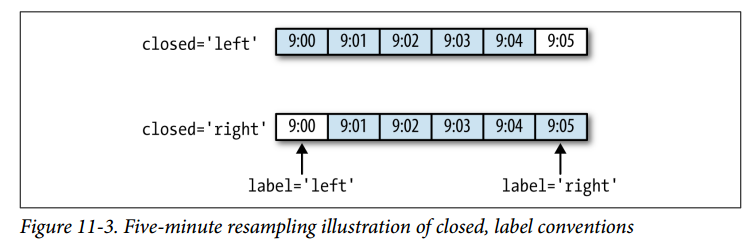

You might want to *shift the result index by some amount*, say subtracting one second from the right edge to make it more clear which interval the timestamp refers to. To do this, pass a string or date offset to `loffset`:

In [245]:
ts.resample("5min", closed="right", label="right", loffset="-1s").sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

You also could have accomplished the effect of `loffset` by calling the shift method on the result without the `loffset`.

#### Open-High-Low-Close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute four values for each bucket: 

the first (open), last (close), maximum (high), and minimal (low) values. 

By using the *ohlc* aggregate function you will obtain a DataFrame having columns containing these four aggregates, which are efficiently computed in a single sweep of the
data:

In [246]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [247]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Upsampling and Interpolation

When converting from a low frequency to a higher frequency, *no aggregation is needed*.

Consider a DataFrame with some weekly data:

In [248]:
frame = pd.DataFrame(
    np.arange(8).reshape(2, 4),
    index=pd.date_range("1/1/2000", periods=2, freq="W-WED"),
    columns=["Colorado", "Texas", "New York", "Ohio"],
)

In [249]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0,1,2,3
2000-01-12,4,5,6,7


When you are using an aggregation function with this data, there is *only one value per group*, and *missing values result in the gaps*. 

We use the `asfreq()` method to convert to the higher frequency **without any aggregation**:

In [250]:
df_daily = frame.resample("D").asfreq()

In [251]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.0,1.0,2.0,3.0
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,4.0,5.0,6.0,7.0


The same filling or interpolation methods available in the `fillna` and `reindex` methods
are available for resampling:

Suppose you wanted to fill forward each weekly value on the non-Wednesdays. 

In [252]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0,1,2,3
2000-01-06,0,1,2,3
2000-01-07,0,1,2,3
2000-01-08,0,1,2,3
2000-01-09,0,1,2,3
2000-01-10,0,1,2,3
2000-01-11,0,1,2,3
2000-01-12,4,5,6,7


In [253]:
frame.asfreq("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.0,1.0,2.0,3.0
2000-01-06,0.0,1.0,2.0,3.0
2000-01-07,0.0,1.0,2.0,3.0
2000-01-08,0.0,1.0,2.0,3.0
2000-01-09,0.0,1.0,2.0,3.0
2000-01-10,0.0,1.0,2.0,3.0
2000-01-11,0.0,1.0,2.0,3.0
2000-01-12,4.0,5.0,6.0,7.0


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [254]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.0,1.0,2.0,3.0
2000-01-06,0.0,1.0,2.0,3.0
2000-01-07,0.0,1.0,2.0,3.0
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,4.0,5.0,6.0,7.0


Notably, the **new date index need not overlap with the old one at all**:

In [255]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0,1,2,3
2000-01-13,4,5,6,7


#### Resampling with Periods

Resampling data indexed by periods is similar to timestamps:

In [256]:
frame = pd.DataFrame(
    np.arange(24 * 4).reshape(24, 4),
    index=pd.period_range("1-2000", "12-2001", freq="M"),
    columns=["Colorado", "Texas", "New York", "Ohio"],
)

In [257]:
frame

,Colorado,Texas,New York,Ohio
2000-01,0,1,2,3
2000-02,4,5,6,7
2000-03,8,9,10,11
2000-04,12,13,14,15
2000-05,16,17,18,19
2000-06,20,21,22,23
2000-07,24,25,26,27
2000-08,28,29,30,31
2000-09,32,33,34,35
2000-10,36,37,38,39


In [258]:
annual_frame = frame.resample("A-DEC").mean()

In [259]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,22,23,24,25
2001,70,71,72,73


Upsampling is more nuanced, as you must make a decision about **which end of the timespan in the new frequency to place the values before resampling**, just like the `asfreq` method. The convention argument defaults to `'start'` but can also be `'end'`:

In [260]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,22,23,24,25
2000Q2,22,23,24,25
2000Q3,22,23,24,25
2000Q4,22,23,24,25
2001Q1,70,71,72,73
2001Q2,70,71,72,73
2001Q3,70,71,72,73
2001Q4,70,71,72,73


In [261]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,22,23,24,25
2001,70,71,72,73


In [262]:
annual_frame.resample("M", convention="end").ffill()

,Colorado,Texas,New York,Ohio
2000-12,22,23,24,25
2001-01,22,23,24,25
2001-02,22,23,24,25
2001-03,22,23,24,25
2001-04,22,23,24,25
2001-05,22,23,24,25
2001-06,22,23,24,25
2001-07,22,23,24,25
2001-08,22,23,24,25
2001-09,22,23,24,25


In [263]:
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,22,23,24,25
2000Q2,22,23,24,25
2000Q3,22,23,24,25
2000Q4,22,23,24,25
2001Q1,70,71,72,73
2001Q2,70,71,72,73
2001Q3,70,71,72,73
2001Q4,70,71,72,73


In [264]:
annual_frame.resample("Q-DEC", convention="end").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,22,23,24,25
2001Q1,22,23,24,25
2001Q2,22,23,24,25
2001Q3,22,23,24,25
2001Q4,70,71,72,73


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:
    
* In downsampling, the target frequency must be a subperiod of the source frequency.
* In upsampling, the target frequency must be a superperiod of the source frequency.

If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annual, and weekly frequencies; for example, the timespans defined by QMAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC:

In [265]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,22,23,24,25
2001Q1,22,23,24,25
2001Q2,22,23,24,25
2001Q3,22,23,24,25
2001Q4,70,71,72,73
2002Q1,70,71,72,73
2002Q2,70,71,72,73
2002Q3,70,71,72,73


#### Moving Window Functions

An important class of array transformations used for time series operations are statistics and other functions evaluated over a *sliding window* or with *exponentially decaying weights*.

This can be useful for *smoothing noisy or gappy data*. 

I call these moving window functions, even though it includes *functions without a fixed-length window* like exponentially weighted moving average. Like other statistical functions, these
also *automatically exclude missing data*.

Before digging in, we can load up some time series data and resample it to business day frequency:

In [266]:
close_px_all = pd.read_csv("examples/stock_px_2.csv", parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()

FileNotFoundError: File b'examples/stock_px_2.csv' does not exist

In [268]:
np.random.seed(0)
import random

random.seed(0)

In [269]:
close_px = pd.DataFrame(
    np.random.randint(100, size=(100, 3)),
    index=pd.date_range(start="1-2000", periods=100, freq="M"),
    columns=["AAPL", "MSFT", "XOM"],
)

In [270]:
close_px

,AAPL,MSFT,XOM
2000-01-31,44,47,64
2000-02-29,67,67,9
2000-03-31,83,21,36
2000-04-30,87,70,88
2000-05-31,88,12,58
2000-06-30,65,39,87
2000-07-31,46,88,81
2000-08-31,37,25,77
2000-09-30,72,9,20
2000-10-31,80,69,79


In [ ]:
close_px = close_px.resample("B").ffill()

In [ ]:
close_px

`rolling` operator behaves similarly to `resample` and `groupby`. It can be called on a Series or DataFrame along with a window (expressed as a number of periods):

In [277]:
%matplotlib inline

In [ ]:
close_px.AAPL.plot()
close_px.AAPL.rolling(100).mean().plot()

The expression `rolling(250)` is similar in behavior to `groupby`, but instead of grouping it creates an object that enables grouping over a 250-day sliding window. So here
we have the 250-day moving window average of Apple’s stock price.

By default rolling functions require all of the values in the window **to be non-NA**. This behavior can be changed to account for missing data and, in particular, the fact that **you will have fewer than window periods of data at the beginning of the time series**. 

In [ ]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [ ]:
appl_std250[:100]

In [ ]:
appl_std250.plot()

In order to compute an **expanding window mean**, use the `expanding` operator instead of `rolling`. The expanding mean starts the time window from the beginning of the time series and *increases the size of the window until it encompasses the whole series*.

An expanding window mean on the `apple_std250` time series looks like this:

In [ ]:
expanding_mean = appl_std250.expanding().mean()

In [ ]:
expanding_mean

In [ ]:
arr = pd.Series(np.arange(10))

In [ ]:
arr

In [ ]:
arr.expanding(3).sum()

Calling a moving window function on a DataFrame applies the transformation to each column

In [ ]:
close_px.rolling(100).mean().plot(logy=True)

The `rolling` function also accepts a string indicating a *fixed-size time offset* rather than a set number of periods. Using this notation can be useful for *irregular time series*. These are the same strings that you can pass to `resample`. For example, we could compute a 20-day `rolling` mean like so:

In [ ]:
close_px

In [ ]:
close_px[:50]

In [ ]:
close_px.rolling("30D").mean()[:5]

In [ ]:
close_px.rolling("H").mean()[:5]

In [ ]:
close_px2 = pd.DataFrame(
    np.random.randint(100, size=(100, 3)),
    index=pd.date_range(start="2000-01-01", periods=100, freq="2D"),
    columns=["AAPL", "MSFT", "XOM"],
)

In [ ]:
close_px2[:15]

In [ ]:
close_px2.rolling("4D").sum()[:5]

In [ ]:
seri = pd.Series(
    np.arange(100) + 1, index=pd.date_range(start="2000-01-01", periods=100, freq="2D")
)

In [ ]:
seri[:20]

In [ ]:
seri.rolling("5D").sum()

#### Exponentially Weighted Functions

An alternative to using a *static window* size with *equally weighted observations* is to specify **a constant decay factor to give more weight to more recent observations**.

There are a couple of ways to specify the decay factor. A popular one is *using a span*,
which makes the result comparable to a simple moving window function with window size equal to the span.

Since an exponentially weighted statistic places more weight on more recent observations, it **“adapts” faster to changes** compared with the equal-weighted version.

pandas has the `ewm` operator to go along with `rolling` and `expanding`. Here’s an example comparing a 60-day moving average of Apple’s stock price with an EW moving average with `span=60`

In [271]:
aapl_px = close_px.AAPL["2006":"2007"]

In [272]:
aapl_px

2006-01-31    44
2006-02-28    67
2006-03-31    76
2006-04-30    61
2006-05-31    43
2006-06-30    84
2006-07-31    37
2006-08-31    27
2006-09-30    23
2006-10-31    46
2006-11-30    29
2006-12-31    39
2007-01-31    41
2007-02-28    46
2007-03-31     3
2007-04-30    10
2007-05-31    71
2007-06-30    85
2007-07-31    34
2007-08-31    33
2007-09-30     0
2007-10-31    69
2007-11-30    62
2007-12-31     1
Freq: M, Name: AAPL, dtype: int32

In [281]:
ma60 = aapl_px.rolling(30, min_periods=10).mean()  # Simple moving average

In [282]:
ewma60 = aapl_px.ewm(span=30).mean()  # Exponentially weighted

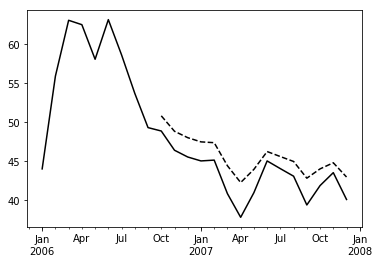

In [283]:
ma60.plot(style="k--", label="Simple MA")
ewma60.plot(style="k-", label="EW MA")

2006-01-31          NaN
2006-02-28          NaN
2006-03-31          NaN
2006-04-30          NaN
2006-05-31          NaN
2006-06-30          NaN
2006-07-31          NaN
2006-08-31          NaN
2006-09-30          NaN
2006-10-31          NaN
2006-11-30          NaN
2006-12-31          NaN
2007-01-31          NaN
2007-02-28          NaN
2007-03-31          NaN
2007-04-30          NaN
2007-05-31          NaN
2007-06-30          NaN
2007-07-31          NaN
2007-08-31    44.950000
2007-09-30    42.809524
2007-10-31    44.000000
2007-11-30    44.782609
2007-12-31    42.958333
Freq: M, Name: AAPL, dtype: float64

### Binary Moving Window Functions

Some statistical operators, like correlation and covariance, need to **operate on two time series**. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the *S&P 500*. To have a look at this, we first compute *the percent change for all of our time series of interest*:

In [317]:
close_px_all = pd.DataFrame(
    np.random.randint(100, size=(100, 4)),
    index=pd.date_range(start="1-2000", periods=100, freq="M"),
    columns=["AAPL", "MSFT", "XOM", "SPX"],
)

In [318]:
spx_px = close_px_all["SPX"]

In [363]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
# close_px = close_px.resample('B').ffill()

In [364]:
spx_px.head(10)

2000-01-31    24
2000-02-29    28
2000-03-31    82
2000-04-30    33
2000-05-31    15
2000-06-30    97
2000-07-31    56
2000-08-31     5
2000-09-30    17
2000-10-31    22
Freq: M, Name: SPX, dtype: int32

In [365]:
spx_rets = spx_px.pct_change()  # (new_value - old_value) / old_value

In [366]:
spx_rets.head(10)

2000-01-31         NaN
2000-02-29    0.166667
2000-03-31    1.928571
2000-04-30   -0.597561
2000-05-31   -0.545455
2000-06-30    5.466667
2000-07-31   -0.422680
2000-08-31   -0.910714
2000-09-30    2.400000
2000-10-31    0.294118
Freq: M, Name: SPX, dtype: float64

In [367]:
close_px.head(10)

,AAPL,MSFT,XOM
2000-01-31,98,5,85
2000-02-29,2,71,75
2000-03-31,95,65,80
2000-04-30,14,21,69
2000-05-31,2,27,19
2000-06-30,71,29,35
2000-07-31,48,49,80
2000-08-31,63,88,58
2000-09-30,51,61,83
2000-10-31,45,96,62


In [368]:
returns = close_px.pct_change()

In [369]:
# spx = pd.concat([spx_rets] * 3, axis = 1)

The `corr` aggregation function after we call `rolling` can then compute the rolling correlation with `spx_rets`

In [370]:
returns.head(5)

,AAPL,MSFT,XOM
2000-01-31,NaN,NaN,NaN
2000-02-29,-0.979592,13.200000,-0.117647
2000-03-31,46.500000,-0.084507,0.066667
2000-04-30,-0.852632,-0.676923,-0.137500
2000-05-31,-0.857143,0.285714,-0.724638


In [371]:
corr.head(5)

,SPX,SPX,SPX
2000-01-31,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN
2000-03-31,1.000000,1.000000,1.000000
2000-04-30,0.954824,0.954824,0.954824
2000-05-31,0.999836,0.999836,0.999836


In [376]:
spx_rets.head(10)

2000-01-31         NaN
2000-02-29    0.166667
2000-03-31    1.928571
2000-04-30   -0.597561
2000-05-31   -0.545455
2000-06-30    5.466667
2000-07-31   -0.422680
2000-08-31   -0.910714
2000-09-30    2.400000
2000-10-31    0.294118
Freq: M, Name: SPX, dtype: float64

In [377]:
corrs = returns["AAPL"].rolling(3, min_periods=2).corr(spx_rets)

In [378]:
corrs.head(10)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.000000
2000-04-30    0.954824
2000-05-31    0.999836
2000-06-30    0.999971
2000-07-31    0.999989
2000-08-31    0.996409
2000-09-30   -0.444294
2000-10-31   -0.855082
Freq: M, dtype: float64

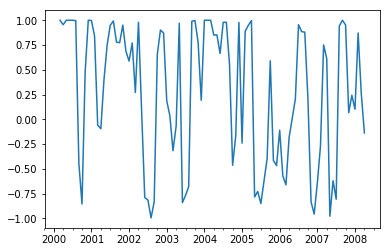

In [379]:
corrs.plot()

Suppose you wanted to compute the correlation of the S&P 500 index with *many stocks* at once. Writing a loop and creating a new DataFrame would be easy but might get repetitive, so if you pass a Series and a DataFrame, a function like `rolling_corr` will compute the correlation of the Series (`spx_rets`, in this case) with each column in the DataFrame :

In [382]:
corrs = returns.rolling(3, min_periods=2).corr(spx_rets)

In [386]:
corrs.head(10)

,AAPL,MSFT,XOM
2000-01-31,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN
2000-03-31,1.000000,-1.000000,1.000000
2000-04-30,0.954824,-0.185350,0.977795
2000-05-31,0.999836,0.149962,0.686509
2000-06-30,0.999971,0.314883,0.925878
2000-07-31,0.999989,-0.751869,0.323931
2000-08-31,0.996409,-0.997692,0.307890
2000-09-30,-0.444294,-0.998775,0.081932
2000-10-31,-0.855082,-0.984531,0.942638


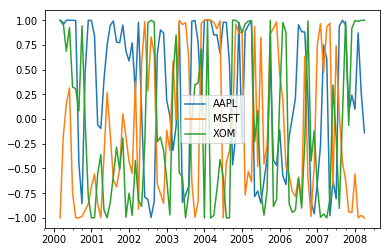

In [384]:
corrs.plot()

### User-Defined Moving Window Functions

The `apply` method on `rolling` and related methods provides a means to apply an array function of your own devising over a moving window. 

The only requirement is that:

**the function produce a single value (a reduction) from each piece of the array.**

For example, while we can compute sample quantiles using `rolling(...).quantile(q)`, we might be interested in the percentile rank of a particular value over the sample. The `scipy.stats.percentileofscore` function does just this:

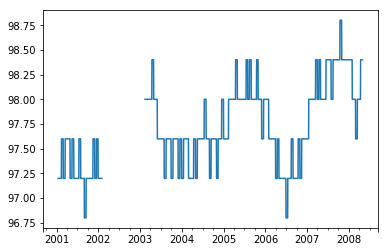

In [295]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()